In [1]:
import pandas as pd
import numpy as np
from random import randint
from datetime import date, timedelta
import calendar

In [38]:
def amount_generator(k):
    return int("".join([str(randint(1,9)) for i in range(k)]))

In [68]:
data = []

In [87]:
start_date = date(2014, 12, 25)

In [88]:
for i in range(50):
    days_in_month = calendar.monthrange(start_date.year, start_date.month)[1]
    dt = start_date + timedelta(days=days_in_month)
    #output_class = random.choice(['Receive','Deliver'])
    row = ['Deutsche Bank',amount_generator(5),dt]
    start_date = dt
    data.append(row)

In [89]:
df = pd.DataFrame(data, columns = ['Client Name','Amount','Date'])
df.set_index('Date',inplace = True)
print(df.head())

              Client Name  Amount
Date                             
2015-01-25  Goldman Sachs   61588
2015-02-25  Goldman Sachs   58925
2015-03-25  Goldman Sachs   48527
2015-04-25  Goldman Sachs   81337
2015-05-25  Goldman Sachs   24987


In [90]:
df.shape

(250, 2)

In [91]:
df.to_csv(r'G:\Codes\dataset.csv')

In [92]:
ts = df[df['Client Name'] == 'JP Morgan']['Amount']

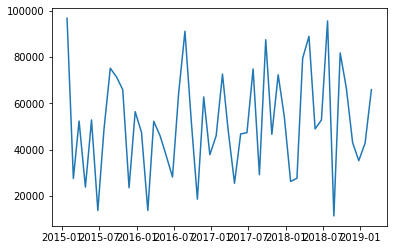

In [93]:
#ts = df['Amount']
import matplotlib.pyplot as plt
plt.plot(ts)
plt.show()

In [94]:
from statsmodels.tsa.stattools import adfuller

In [95]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

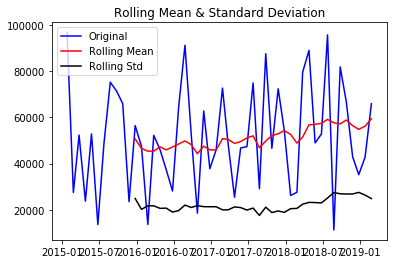

Results of Dickey-Fuller Test:
Test Statistic                -8.383043e+00
p-value                        2.480344e-13
#Lags Used                     0.000000e+00
Number of Observations Used    4.900000e+01
Critical Value (1%)           -3.571472e+00
Critical Value (5%)           -2.922629e+00
Critical Value (10%)          -2.599336e+00
dtype: float64


In [96]:
test_stationarity(ts)